In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sklearn.decomposition
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.multivariate_functional import MultivariateFunctionalData
from FDApy.fpca import UFPCA, MFPCA
from FDApy.local_polynomial import LocalPolynomial
from FDApy.plot import *
from FDApy.utils import *

In [2]:
# Load the data into a Pandas Dataframes
precipitation = pd.read_csv(''.join([CURRENT_DIR, '/canadian_precipitation_monthly.csv']), index_col=0)
temperature = pd.read_csv(''.join([CURRENT_DIR, '/canadian_temperature_daily.csv']), index_col=0)

In [3]:
# Create univariate functional data for the precipitation data
argvals = tuple(pd.factorize(precipitation.columns)[0])
values = np.array(precipitation)
monthlyPrec = UnivariateFunctionalData(argvals, values)

In [4]:
# Create univariate functional data for the daily temperature data.
argvals = tuple(pd.factorize(temperature.columns)[0])
values = np.array(temperature)
dailyTemp = UnivariateFunctionalData(argvals, values)

In [5]:
# Create multivariate functional data for the Canadian weather data.
canadWeather = MultivariateFunctionalData([dailyTemp, monthlyPrec])

In [6]:
# Print example of a UnivariateFunctionalData
dailyTemp

Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)

In [7]:
# Print example of a MultivariateFunctionalData
canadWeather

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (35, 12)

In [8]:
# Accessing the attribut of the classes
monthlyPrec.argvals

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)]

In [9]:
# Number of observations for an object
monthlyPrec.nObs()

35

In [10]:
# Mean function of the monthly precipitation
monthlyPrec.mean()

Univariate Functional data objects with 1 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12)

In [11]:
# Covariance function of the monthly precipitation
monthlyPrec.covariance()

Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12, 12)

In [12]:
# Number of sampling points for an object
canadWeather.nObsPoint()

[[365], [12]]

In [13]:
# Mean functions of the canadian weather
canadWeather.mean()

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 1 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (1, 365)
- Univariate Functional data objects with 1 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12)

In [14]:
# Covariance functions of the canadian weather
canadWeather.covariance()

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (1, 365, 365)
- Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12, 12)

In [15]:
# Dimension of the domain of observations
dailyTemp.dimension()

1

In [16]:
# Extract observations from UnivariateFunctionalData
dailyTemp[3:6]

Univariate Functional data objects with 3 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (3, 365)

In [17]:
# Extract functions from MultivariateFunctionalData
canadWeather[0]

Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)

In [18]:
# Convert UnivariateFunctionalData into IrregularFunctionalData.
dailyTemp.asIrregularFunctionalData()

Irregular Functional data objects with 35 observations of 1-dimensional support
argvals:
	Values in 0 ... 364.
values:
	Values in -34.8 ... 22.8.
There are 365 - 365 sampling points per observation.

In [19]:
# Convert UnivariateFunctionalData into MultivariateFunctionalData.
monthlyPrec.asMultivariateFunctionalData()

Multivariate Functional data objects with 1 funtions:
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (35, 12)

In [20]:
# Add another function to a MultivariateFunctionalData
#canadWeather.add(dailyTemp)

In [6]:
# Perform a univariate FPCA on dailyTemp.
fpca = UFPCA(n_components=0.99, whiten=True)
fpca.fit(dailyTemp)

In [7]:
# Compute the scores of the dailyTemp data into the eigenfunctions basis.
dailyTemp_proj = fpca.transform(dailyTemp)

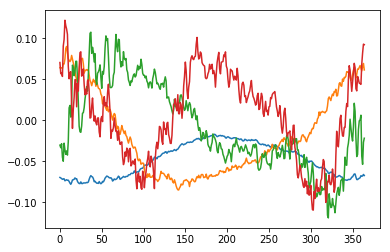

In [8]:
# Plot the results of the FPCA
for eigenfunction in fpca.eigenfunctions:
    plt.plot(eigenfunction)

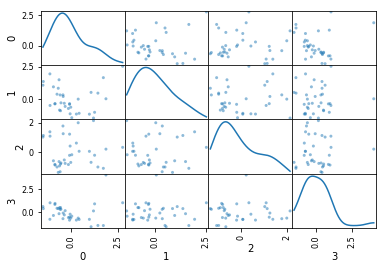

In [9]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(dailyTemp_proj), diagonal='kde')
plt.show()

In [10]:
# Test if the reconstruction is good.
dailyTemp_reconst = fpca.inverse_transform(dailyTemp_proj)

In [11]:
# Perform a univariate FPCA on monthlyPrec.
fpca = UFPCA(n_components=0.99, whiten=True)
fpca.fit(monthlyPrec)

In [12]:
# Compute the scores of the monthlyPrec data into the eigenfunctions basis.
monthlyPrec_proj = fpca.transform(monthlyPrec)

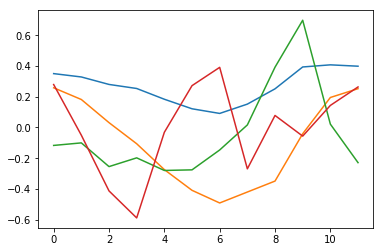

In [13]:
# Plot the results of the FPCA
for eigenfunction in fpca.eigenfunctions:
    plt.plot(eigenfunction)

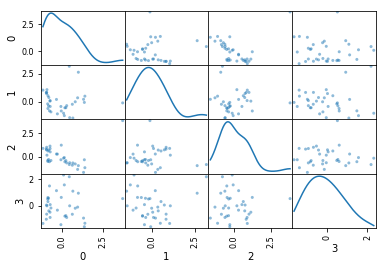

In [14]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(monthlyPrec_proj), diagonal='kde')
plt.show()

In [15]:
# Test if the reconstruction is good.
monthlyPrec_reconst = fpca.inverse_transform(monthlyPrec_proj)

In [16]:
# Perform multivariate FPCA
mfpca = MFPCA(n_components=0.99, whiten=True)
mfpca.fit(canadWeather)

In [17]:
# Compute the scores of the canadWeather data into the multivariate eigenfunctions basis.
canadWeather_proj = mfpca.transform(canadWeather)

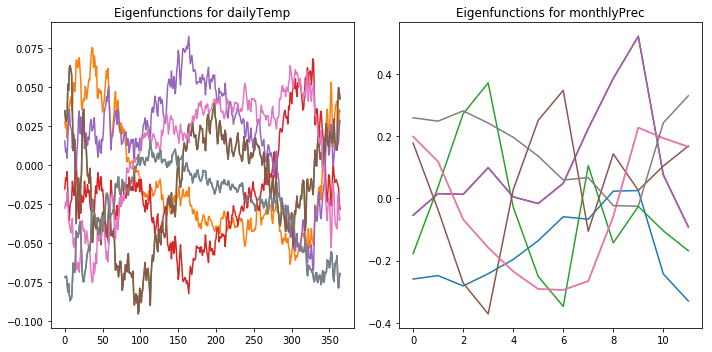

In [18]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(mfpca.basis_[0])
plt.title('Eigenfunctions for dailyTemp')

plt.subplot(1, 2, 2)
plt.plot(mfpca.basis_[1])
plt.title('Eigenfunctions for monthlyPrec')

plt.tight_layout()
plt.show()

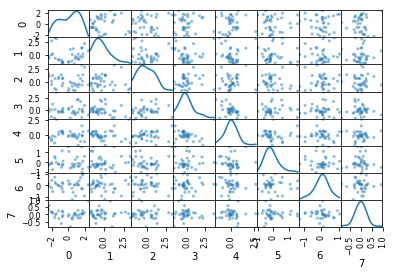

In [19]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(canadWeather_proj), diagonal='kde')
plt.show()

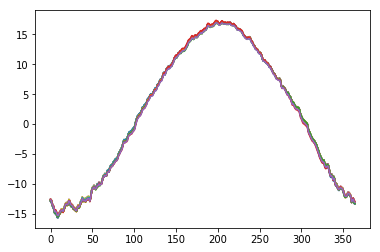

In [20]:
for idx, a in enumerate(canadWeather_proj):
    plt.plot(np.dot(canadWeather_proj[idx],
                    mfpca.basis_[0].T) + mfpca.ufpca_[0].mean_)

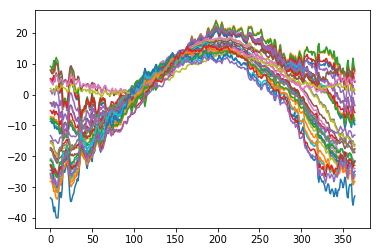

In [35]:
plt.plot((np.dot(canadWeather_proj,\
                np.sqrt(\
                        np.concatenate((mfpca.ufpca_[0].explained_variance_,\
                                mfpca.ufpca_[1].explained_variance_))[:, np.newaxis]) *\
       mfpca.basis_[0].T) + mfpca.ufpca_[0].mean_).T)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6c204a76d8>)

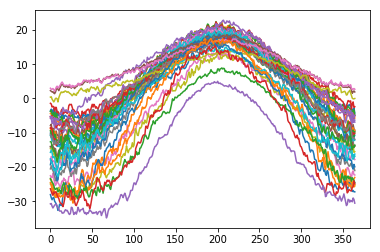

In [32]:
plot(dailyTemp)

In [25]:
# Smooth the data
points = tuple(i / 10 for i in range(min(dailyTemp.argvals[0]), 10*(max(dailyTemp.argvals[0]) + 1), 1))
dailyTempSmooth = dailyTemp.smooth(points, bandwith=5)

In [26]:
# Compute the tensor product of monthlyPrec and dailyTemp
tensProd = dailyTemp.tensorProduct(monthlyPrec)

In [27]:
# Integrate the observations of dailyTemp over the domain
inte = dailyTemp.integrate(method='simpson')

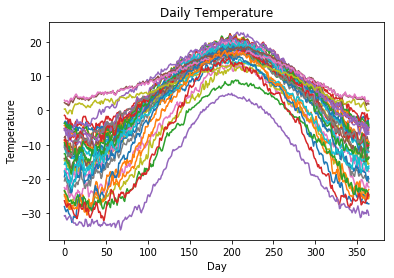

In [28]:
# Plot univariate data
fig, ax = plot(dailyTemp, main='Daily Temperature', xlab='Day', ylab='Temperature')
plt.show()

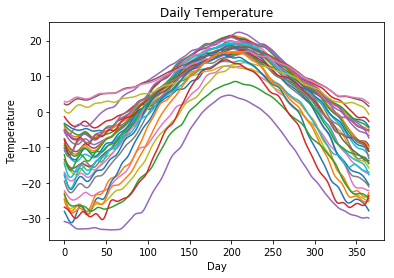

In [29]:
# Plot univariate smooth data
fig, ax = plot(dailyTempSmooth, main='Daily Temperature', xlab='Day', ylab='Temperature')
plt.show()

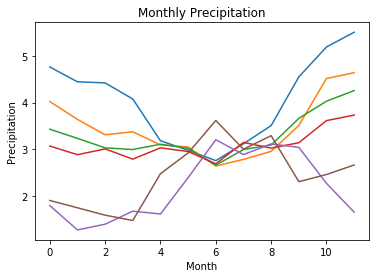

In [30]:
# Plot sample of univariate data
fig, ax = plot(monthlyPrec[2:8], main='Monthly Precipitation', xlab='Month', ylab='Precipitation')
plt.show()

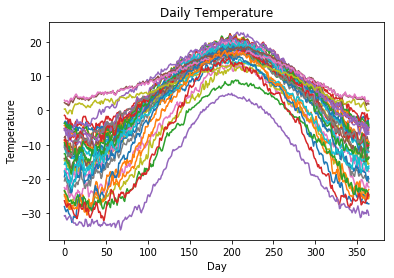

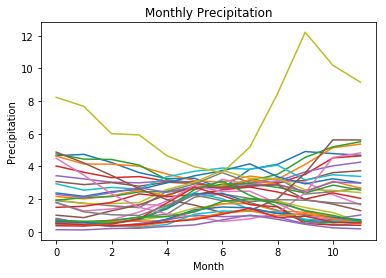

In [31]:
# Plot multivariate data
figs, axes = plot(canadWeather, 
                  main=['Daily Temperature', 'Monthly Precipitation'],
                  xlab=['Day', 'Month'],
                  ylab=['Temperature', 'Precipitation'])
plt.show()